In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prev = pd.read_csv('../input/previous_application.csv')

In [3]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
(prev.isnull().sum() / len(prev)).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_DOWN_PAYMENT              5.363648e-01
AMT_DOWN_PAYMENT               5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
DAYS_TERMINATION               4.029813e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
AMT_APPLICATION                0

<font size=3> NOTE: NFLAG_MICRO_CASH mentioned in the feaure description is not provided int the data

In [5]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

In [6]:
prev['FLAG_LAST_APPL_PER_CONTRACT'], _ = pd.factorize(prev['FLAG_LAST_APPL_PER_CONTRACT'])

<font size=5> DISTRIBUTION

In [7]:
cate_cols = [col for col in prev.columns if prev[col].dtype=='object']

In [8]:
cate_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

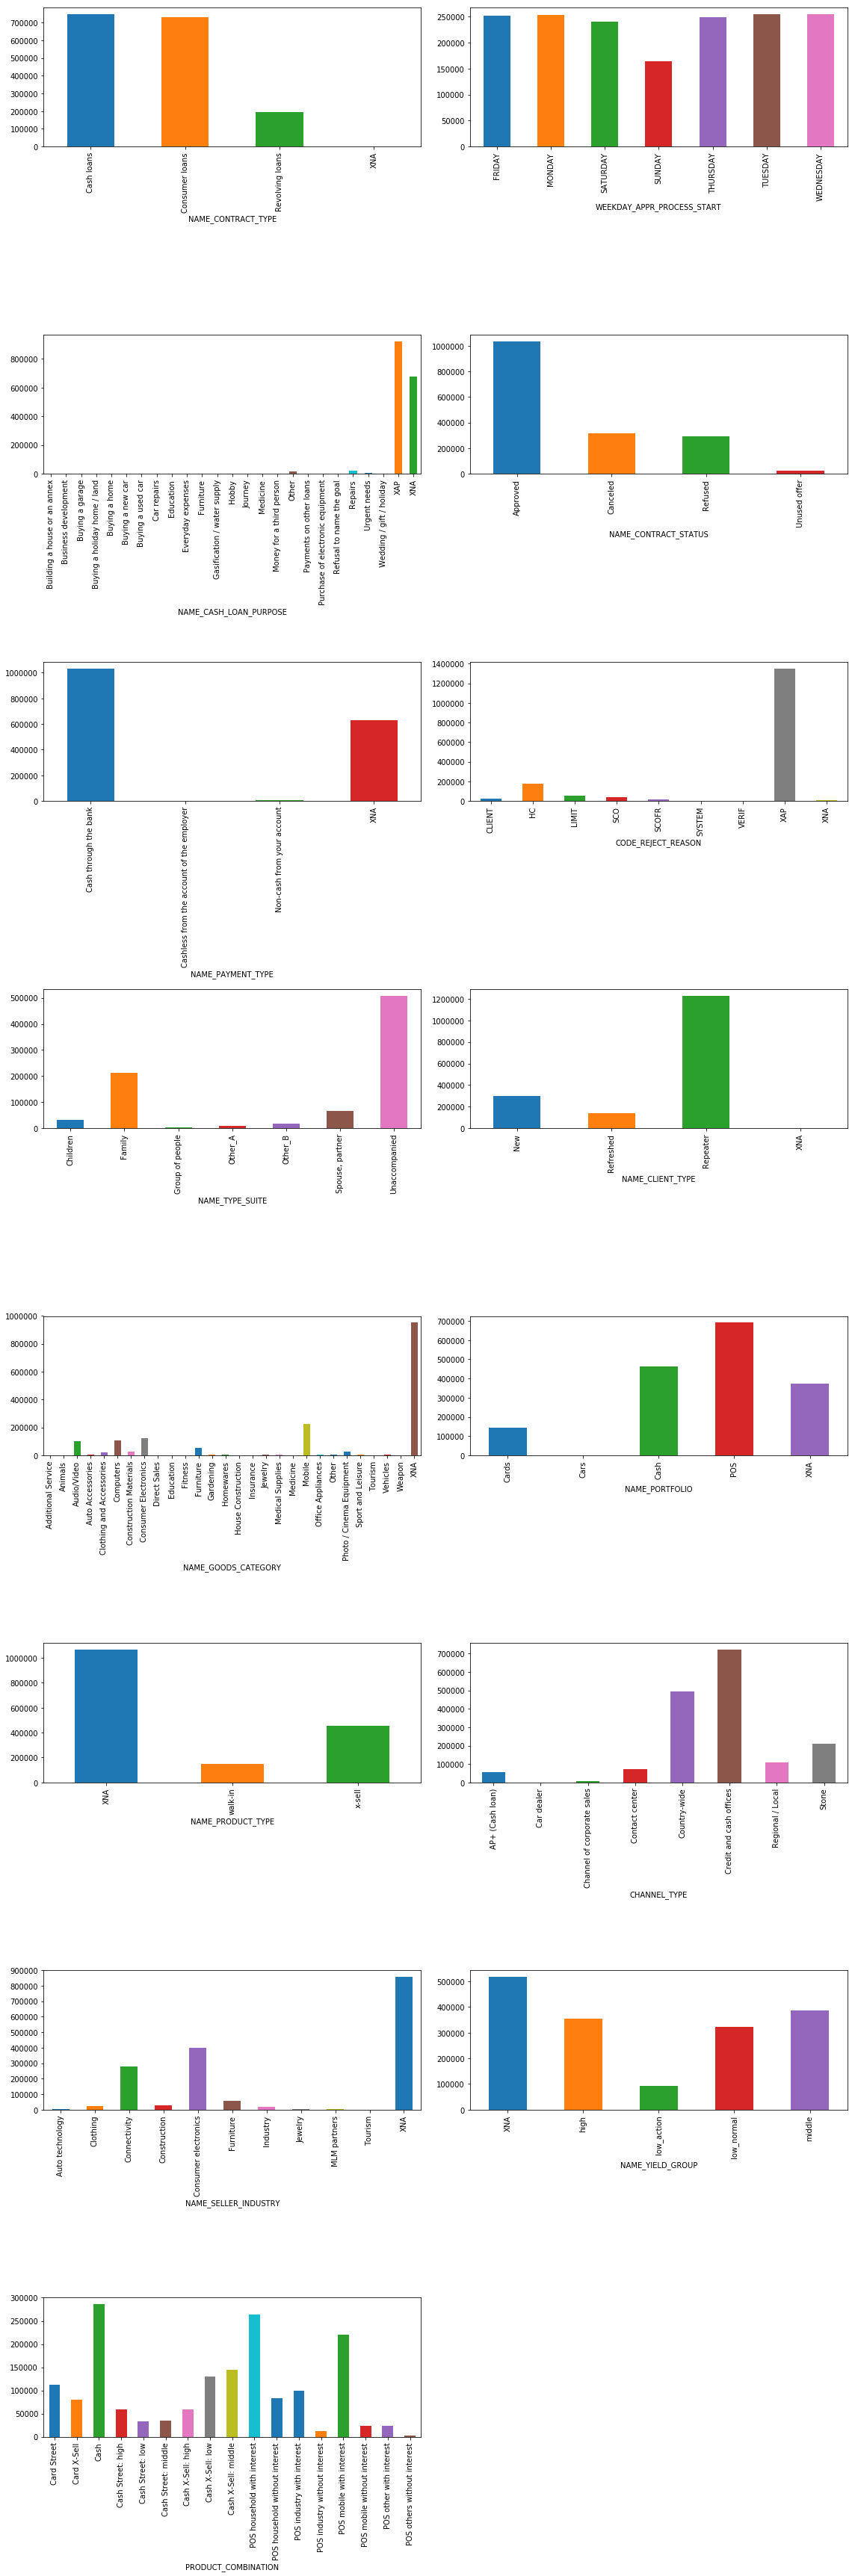

In [9]:
def draw_cate_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(16, 48))
    for col in cols:
        plt.subplot(n_row, 2, i)
        prev.groupby(col).size().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()

draw_cate_dist(cate_cols)

<font size=5> DIST on FLAG cols

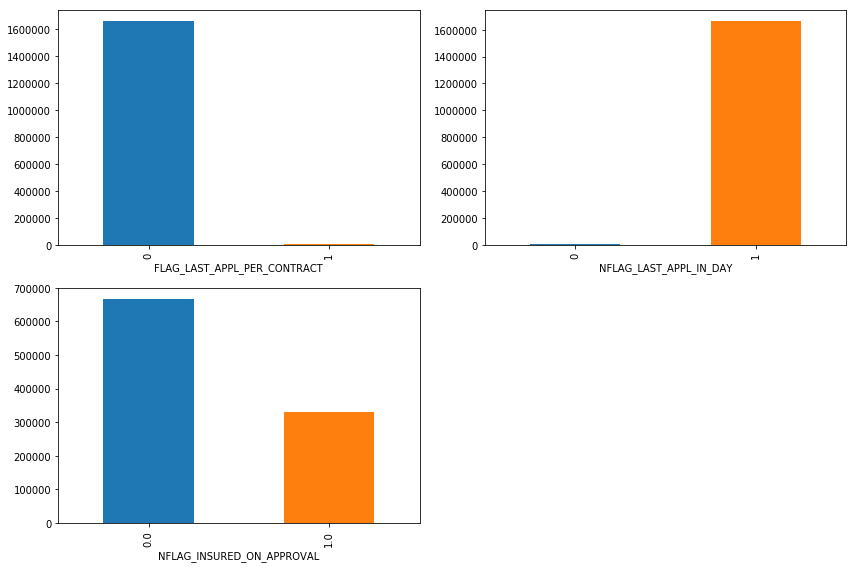

In [10]:
flag_cols = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']

def draw_flag_dist(cols):
    from math import ceil
    n_row = ceil(len(cols) / 2)
    i = 1
    plt.figure(figsize=(12, 8))
    for col in cols:
        plt.subplot(n_row, 2, i)
        prev.groupby(col).size().plot(kind='bar')
        i += 1
    plt.tight_layout()
    plt.show()
draw_flag_dist(flag_cols)

<font size=5> DIST on AMT cols

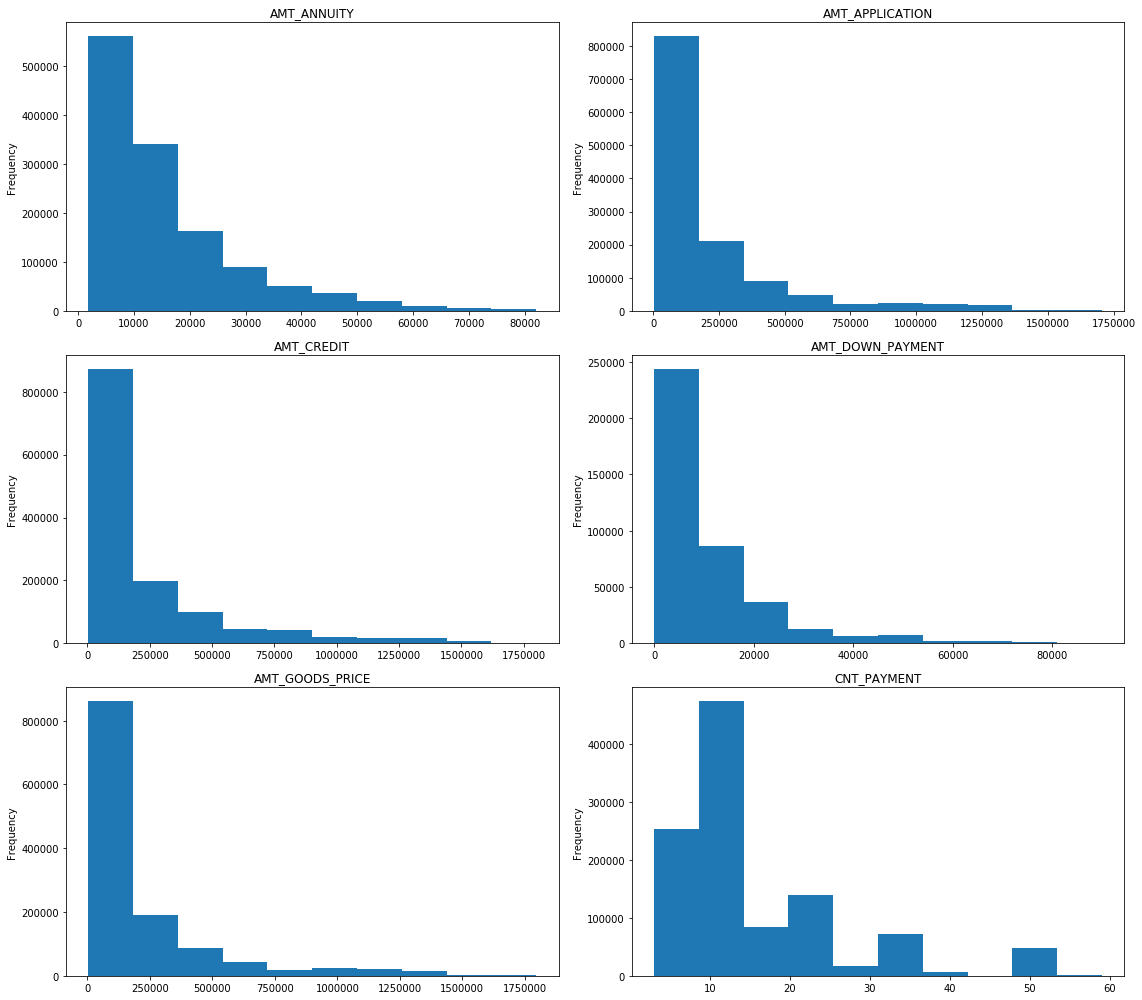

In [11]:
def draw_amt_dist(amt_cols):
    from math import ceil
    n_row = ceil(len(amt_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 14))
    for col in amt_cols:
        plt.subplot(n_row, 2, i)
        if prev[col].nunique() > 10:
            up_bnd = prev[col].quantile(.995)
            low_bnd = prev[col].quantile(.005)
            prev[(prev[col] > low_bnd) & (prev[col] < up_bnd)][col].plot(kind='hist')
        else:
            prev[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

amt_cols = [col for col in prev.columns if "AMT" in col] + ['CNT_PAYMENT']
draw_amt_dist(amt_cols)

<font size=5> DIST on DAYS cols

<font size=3> SOME NOTES 
DAYS_FIRST_DUE - when was the first due date (first installment)

DAYS_LAST_DUE_1ST_VERSION - when was the planned last due date (last installment) - information from the time of application


DAYS_LAST_DUE - when was the last due date (last installment) - most recent information (last due date may change e.g. in case of early repayment or payment difficulties)

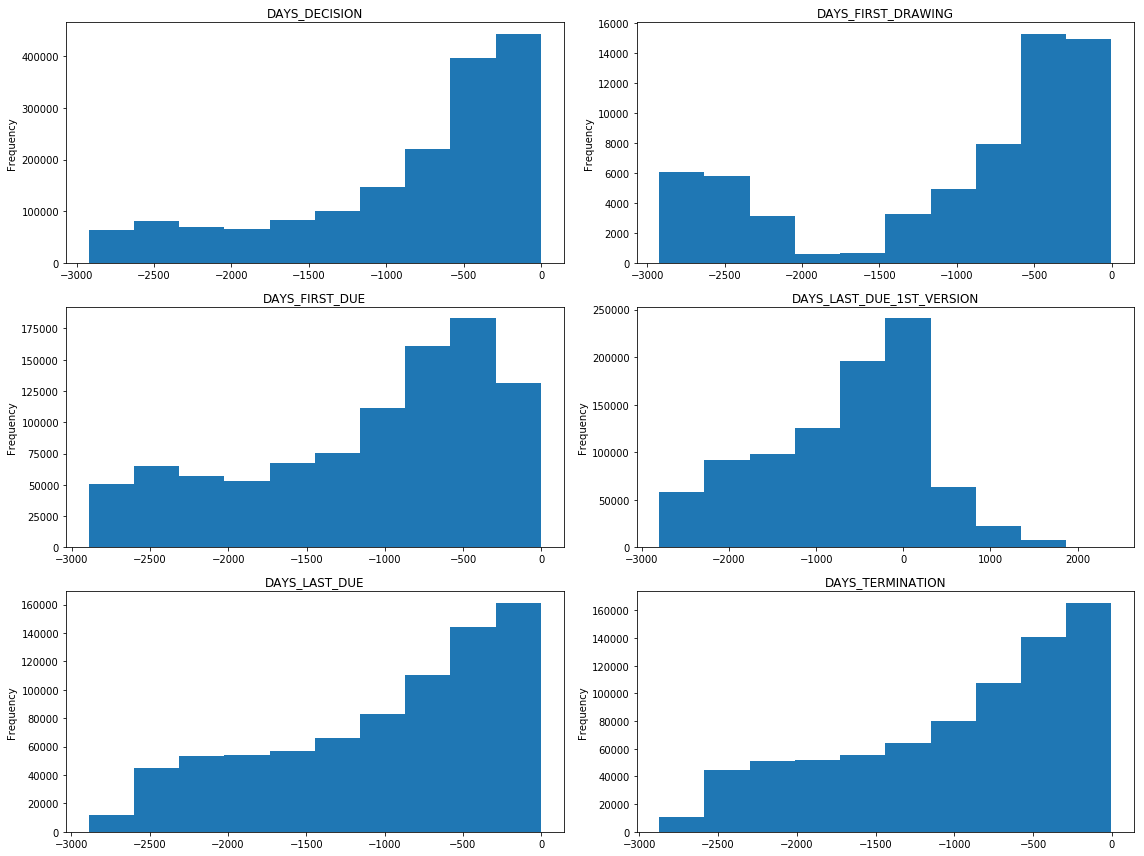

In [12]:
def draw_days_dist(days_cols):
    from math import ceil
    n_row = ceil(len(days_cols) / 2)
    i = 1
    plt.figure(figsize=(16, 12))
    for col in days_cols:
        plt.subplot(n_row, 2, i)
        prev[col].plot(kind='hist')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.show()

days_cols = [col for col in prev.columns if "DAYS" in col]
draw_days_dist(days_cols)

<font size=5> SELLERPLACE_AREA - an cate col but encoding as int

In [13]:
prev.groupby('SELLERPLACE_AREA').size().sort_values(ascending=False)[:50] / len(prev)

SELLERPLACE_AREA
-1       0.456633
 0       0.036237
 50      0.022393
 30      0.020610
 20      0.020261
 100     0.018805
 40      0.014626
 25      0.010862
 15      0.010283
 150     0.009970
 10      0.009893
 5       0.008946
 200     0.007675
 4       0.007662
 1000    0.007537
 60      0.006552
 35      0.006267
 1500    0.005920
 300     0.005573
 2000    0.005223
 45      0.005081
 80      0.004807
 70      0.004719
 6       0.004437
 500     0.003793
 32      0.003321
 3       0.003276
 1       0.003158
 1200    0.002912
 250     0.002812
 36      0.002717
 42      0.002696
 2       0.002619
 24      0.002599
 120     0.002546
 34      0.002465
 140     0.002346
 400     0.002306
 18      0.002303
 55      0.002208
 3000    0.002197
 38      0.002164
 12      0.002155
 21      0.002146
 145     0.002121
 90      0.002080
 28      0.002072
 31      0.002052
 23      0.002042
 1600    0.002027
dtype: float64

<font size=5> MANUAL FEATURE

In [14]:
# handle on AMT features
prev['APP_TO_CREDIT_RATIO'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
prev['ANNUITY_TO_CREDIT_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_CREDIT']
# there is still some tiny difference between DOWN_TO_CREDIT & RATE_DOWN_PAYMENT
# so we just keep it
prev['DOWN_TO_CREDIT_RATIO'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']
prev['PRICE_TO_CREDIT_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_CREDIT']
prev['PRICE_TO_APP_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']
prev['DOWN_TO_APP_RATIO'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_APPLICATION']

prev['AVG_PAYMENT_AMT_CREDIT'] = prev['AMT_CREDIT'] / prev['CNT_PAYMENT']
prev['AVG_PAYMENT_AMT_ANNUITY'] = prev['AMT_ANNUITY'] / prev['CNT_PAYMENT']
prev['AVG_PAYMENT_TOTAL'] = prev['AVG_PAYMENT_AMT_CREDIT'] + prev['AVG_PAYMENT_AMT_ANNUITY']

In [15]:
# handle on DAYS features
prev['PLAN_TIME_SPAN'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_FIRST_DUE']
prev['ACTUAL_TIME_SPAN'] = prev['DAYS_LAST_DUE'] - prev['DAYS_FIRST_DUE']
prev['LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE'] - prev['DAYS_LAST_DUE_1ST_VERSION']
prev['ACTUAL_TIME_SPAN_TO_PLAN_RATIO'] = prev['ACTUAL_TIME_SPAN'] / prev['PLAN_TIME_SPAN']
prev['DAYS_DESICION_TO_FTRST_DUE_RATIO'] = prev['DAYS_DECISION'] / prev['DAYS_FIRST_DUE']
prev['DAYS_TERMINATION_SUB_LAST_DUE'] = prev['DAYS_TERMINATION'] - prev['DAYS_LAST_DUE']

prev['IS_EARLY_PAID'] = (prev['DAYS_LAST_DUE'] < prev['DAYS_LAST_DUE_1ST_VERSION']).astype('float')
# LAST_DUE was later than planned, might indicate finicial difficulty
prev['IS_LATER_PAID'] = (prev['DAYS_LAST_DUE'] > prev['DAYS_LAST_DUE_1ST_VERSION']).astype('float')
prev['IS_FISRT_DRAWING_LATER_THAN_LAST_DUE'] = (prev['DAYS_FIRST_DRAWING'] > prev['DAYS_LAST_DUE']).astype('float')
prev['IS_FISRT_DRAWING_LATER_THAN_FIRST_DUE'] = (prev['DAYS_FIRST_DRAWING'] > prev['DAYS_FIRST_DUE']).astype('float')

prev['AVG_PAYMENT_DAYS'] = prev['ACTUAL_TIME_SPAN'] / prev['CNT_PAYMENT']

prev['AVG_PAYMENT_BY_DAY'] = prev['AMT_CREDIT'] / prev['ACTUAL_TIME_SPAN']
prev['AVG_ANNUITY_BY_DAY'] = prev['AMT_ANNUITY'] / prev['ACTUAL_TIME_SPAN']
prev['AVG_TOTAL_PAYMENT_BY_DAY'] = prev['AVG_ANNUITY_BY_DAY'] / prev['AVG_PAYMENT_BY_DAY']

In [16]:
#OTHER
prev['IS_SELLERPLACE_AREA_MINUS_1'] = (prev['SELLERPLACE_AREA'] == -1).astype('float')
prev['IS_SELLERPLACE_AREA_ZERO'] = (prev['SELLERPLACE_AREA'] == 0).astype('float')

In [17]:
def app_diversity_on_cate_cols(df, process_info):
    ret = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().\
        reset_index().\
        rename(index=str, columns={'SK_ID_PREV': 'USR_APP_CNT'})

    for col_name in process_info:
        new_col_name = 'N_UNIQUE_ON_' + col_name
        gby = df.groupby('SK_ID_CURR')[col_name].nunique().\
            reset_index().\
            rename(index=str, columns={col_name: new_col_name})
        ret = ret.merge(gby, on='SK_ID_CURR', how='left')
        ret['USR_APP_DIVERSITY_ON_' +
            col_name] = ret['USR_APP_CNT'] / ret[new_col_name]

    return ret

diversity_df = app_diversity_on_cate_cols(prev, [col for col in prev.columns if prev[col].dtype == 'object'])

In [18]:
def one_hot_encoding(df, nan_as_category):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [19]:
prev, cat_cols = one_hot_encoding(prev, nan_as_category=True)
# Previous applications numeric features
num_aggregations = {
    # original features
    'AMT_ANNUITY': ['mean', 'sum', 'min', 'max'],
    'AMT_APPLICATION': ['mean', 'sum', 'min', 'max'],
    'AMT_CREDIT': ['mean', 'sum', 'min', 'max'],
    'AMT_DOWN_PAYMENT': ['mean', 'sum', 'min', 'max'],
    'AMT_GOODS_PRICE': ['mean', 'sum', 'min', 'max'],
    'HOUR_APPR_PROCESS_START': ['mean', 'min', 'max'],
    
    'FLAG_LAST_APPL_PER_CONTRACT': ['mean', 'sum'],
    'NFLAG_LAST_APPL_IN_DAY': ['mean', 'sum'],
    'NFLAG_INSURED_ON_APPROVAL': ['mean', 'sum'],
    
    'RATE_DOWN_PAYMENT': ['mean', 'min', 'max'],
    'RATE_INTEREST_PRIMARY': ['mean', 'min', 'max'],
    'RATE_INTEREST_PRIVILEGED': ['mean', 'min', 'max'],

    'DAYS_DECISION': ['max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    
    'DAYS_FIRST_DRAWING': ['min', 'max'], 
    'DAYS_FIRST_DUE': ['min', 'max'],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max'],
    'DAYS_LAST_DUE': ['min', 'max'],
    'DAYS_TERMINATION': ['min', 'max'],
    
    # manual features    
    'APP_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'ANNUITY_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'DOWN_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'PRICE_TO_CREDIT_RATIO': ['mean', 'min', 'max'],
    'PRICE_TO_APP_RATIO': ['mean', 'min', 'max'],
    'DOWN_TO_APP_RATIO': ['mean', 'min', 'max'],

    'AVG_PAYMENT_AMT_CREDIT': ['mean', 'min', 'max'],
    'AVG_PAYMENT_AMT_ANNUITY': ['mean', 'min', 'max'],
    'AVG_PAYMENT_TOTAL': ['mean', 'min', 'max'],
    
    'PLAN_TIME_SPAN': ['mean', 'sum', 'min', 'max'],
    'ACTUAL_TIME_SPAN': ['mean', 'sum', 'min', 'max'],
    'LAST_DUE_DIFF': ['mean', 'sum', 'min', 'max'],
    'ACTUAL_TIME_SPAN_TO_PLAN_RATIO': ['mean', 'min', 'max'],
    'DAYS_DESICION_TO_FTRST_DUE_RATIO': ['mean', 'min', 'max'],
    'DAYS_TERMINATION_SUB_LAST_DUE': ['mean', 'min', 'max'],

    'IS_EARLY_PAID': ['mean', 'sum'],
    'IS_LATER_PAID': ['mean', 'sum'],
    'IS_FISRT_DRAWING_LATER_THAN_LAST_DUE': ['mean', 'sum'],
    'IS_FISRT_DRAWING_LATER_THAN_FIRST_DUE': ['mean', 'sum'],

    'AVG_PAYMENT_DAYS': ['mean', 'min', 'max'],
    'AVG_PAYMENT_BY_DAY': ['mean', 'min', 'max'],
    'AVG_ANNUITY_BY_DAY': ['mean', 'min', 'max'],
    'AVG_TOTAL_PAYMENT_BY_DAY': ['mean', 'min', 'max'],
    
    'IS_SELLERPLACE_AREA_MINUS_1': ['mean', 'sum'],
    'IS_SELLERPLACE_AREA_ZERO': ['mean', 'sum'],
}

# Previous applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean', 'sum']
prev_agg = prev.groupby('SK_ID_CURR').agg(
    {**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(
    ['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
# add the diversity features
prev_agg = prev_agg.merge(diversity_df, on='SK_ID_CURR', how='left')

# Previous Applications: Approved Applications
approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
approved_agg.columns = pd.Index(
    ['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications
refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
refused_agg.columns = pd.Index(
    ['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg, prev, diversity_df
gc.collect()

33720

In [20]:
for col in prev_agg.columns:
    print(col)

SK_ID_CURR
PREV_AMT_ANNUITY_MEAN
PREV_AMT_ANNUITY_SUM
PREV_AMT_ANNUITY_MIN
PREV_AMT_ANNUITY_MAX
PREV_AMT_APPLICATION_MEAN
PREV_AMT_APPLICATION_SUM
PREV_AMT_APPLICATION_MIN
PREV_AMT_APPLICATION_MAX
PREV_AMT_CREDIT_MEAN
PREV_AMT_CREDIT_SUM
PREV_AMT_CREDIT_MIN
PREV_AMT_CREDIT_MAX
PREV_AMT_DOWN_PAYMENT_MEAN
PREV_AMT_DOWN_PAYMENT_SUM
PREV_AMT_DOWN_PAYMENT_MIN
PREV_AMT_DOWN_PAYMENT_MAX
PREV_AMT_GOODS_PRICE_MEAN
PREV_AMT_GOODS_PRICE_SUM
PREV_AMT_GOODS_PRICE_MIN
PREV_AMT_GOODS_PRICE_MAX
PREV_HOUR_APPR_PROCESS_START_MEAN
PREV_HOUR_APPR_PROCESS_START_MIN
PREV_HOUR_APPR_PROCESS_START_MAX
PREV_FLAG_LAST_APPL_PER_CONTRACT_MEAN
PREV_FLAG_LAST_APPL_PER_CONTRACT_SUM
PREV_NFLAG_LAST_APPL_IN_DAY_MEAN
PREV_NFLAG_LAST_APPL_IN_DAY_SUM
PREV_NFLAG_INSURED_ON_APPROVAL_MEAN
PREV_NFLAG_INSURED_ON_APPROVAL_SUM
PREV_RATE_DOWN_PAYMENT_MEAN
PREV_RATE_DOWN_PAYMENT_MIN
PREV_RATE_DOWN_PAYMENT_MAX
PREV_RATE_INTEREST_PRIMARY_MEAN
PREV_RATE_INTEREST_PRIMARY_MIN
PREV_RATE_INTEREST_PRIMARY_MAX
PREV_RATE_INTEREST_PRIVILEGED

APPROVED_AMT_ANNUITY_SUM
APPROVED_AMT_ANNUITY_MIN
APPROVED_AMT_ANNUITY_MAX
APPROVED_AMT_APPLICATION_MEAN
APPROVED_AMT_APPLICATION_SUM
APPROVED_AMT_APPLICATION_MIN
APPROVED_AMT_APPLICATION_MAX
APPROVED_AMT_CREDIT_MEAN
APPROVED_AMT_CREDIT_SUM
APPROVED_AMT_CREDIT_MIN
APPROVED_AMT_CREDIT_MAX
APPROVED_AMT_DOWN_PAYMENT_MEAN
APPROVED_AMT_DOWN_PAYMENT_SUM
APPROVED_AMT_DOWN_PAYMENT_MIN
APPROVED_AMT_DOWN_PAYMENT_MAX
APPROVED_AMT_GOODS_PRICE_MEAN
APPROVED_AMT_GOODS_PRICE_SUM
APPROVED_AMT_GOODS_PRICE_MIN
APPROVED_AMT_GOODS_PRICE_MAX
APPROVED_HOUR_APPR_PROCESS_START_MEAN
APPROVED_HOUR_APPR_PROCESS_START_MIN
APPROVED_HOUR_APPR_PROCESS_START_MAX
APPROVED_FLAG_LAST_APPL_PER_CONTRACT_MEAN
APPROVED_FLAG_LAST_APPL_PER_CONTRACT_SUM
APPROVED_NFLAG_LAST_APPL_IN_DAY_MEAN
APPROVED_NFLAG_LAST_APPL_IN_DAY_SUM
APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN
APPROVED_NFLAG_INSURED_ON_APPROVAL_SUM
APPROVED_RATE_DOWN_PAYMENT_MEAN
APPROVED_RATE_DOWN_PAYMENT_MIN
APPROVED_RATE_DOWN_PAYMENT_MAX
APPROVED_RATE_INTEREST_PRIMARY_M

In [21]:
len(prev_agg.columns)

1340